In [1]:
# http://www.moxleystratton.com/tensorflow-visualizing-weights/

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Sequential: https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='tanh')
])

learning_rate = 0.5
# optimizer = tf.train.GradientDescentOptimizer(learning_rate)
optimizer = tf.optimizers.SGD (learning_rate=learning_rate, name='SGD')
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [12]:
# This function is used to generate training labels
# We need to match neuron's activation function
def tanh(x):
    x_sum = np.sum(x)
    return np.tanh(x_sum)

train_data = np.random.random((500, 2))
train_labels = np.array(list(map(tanh, train_data)))

In [13]:
test_data = np.random.random((10, 2))
test_labels = np.array(list(map(tanh, test_data)))

test_loss, _ = model.evaluate(test_data, test_labels)
print('loss:', test_loss)
# loss: 0.19740669429302216

1/1 [==============================] - 0s 429ms/step - loss: 0.0043 - accuracy: 0.0000e+00
loss: 0.00429026922211051


In [14]:
# Records the weights throughout the training process
weights_history = []

# A custom callback
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback
class MyCallback(keras.callbacks.Callback):
    def on_batch_end(self, batch, logs):
        weights, _biases = model.get_weights()
        w1, w2 = weights
        weights = [w1[0], w2[0]]
        print('on_batch_end() model.weights:', weights)
        weights_history.append(weights)


callback = MyCallback()

In [29]:
# fit(): https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#fit
model.fit(train_data, train_labels, epochs=10,
          verbose=False, callbacks=[callback])

on_batch_end() model.weights: [0.9956526, 0.9961216]
on_batch_end() model.weights: [0.9956732, 0.9961394]
on_batch_end() model.weights: [0.99569225, 0.99615663]
on_batch_end() model.weights: [0.99570954, 0.9961711]
on_batch_end() model.weights: [0.9957274, 0.9961865]
on_batch_end() model.weights: [0.9957462, 0.99620277]
on_batch_end() model.weights: [0.9957642, 0.9962182]
on_batch_end() model.weights: [0.99578166, 0.9962339]
on_batch_end() model.weights: [0.9957992, 0.99624956]
on_batch_end() model.weights: [0.9958181, 0.99626744]
on_batch_end() model.weights: [0.99583745, 0.99628377]
on_batch_end() model.weights: [0.99585754, 0.99630153]
on_batch_end() model.weights: [0.9958776, 0.9963176]
on_batch_end() model.weights: [0.99589795, 0.9963353]
on_batch_end() model.weights: [0.99591833, 0.9963538]
on_batch_end() model.weights: [0.99593866, 0.99637175]
on_batch_end() model.weights: [0.99595946, 0.9963905]
on_batch_end() model.weights: [0.9959787, 0.99640805]
on_batch_end() model.weights:

In [16]:
test_loss, _ = model.evaluate(test_data, test_labels)
print('loss:', test_loss)
# loss: 0.00015836639795452356

1/1 [==============================] - 0s 38ms/step - loss: 3.6813e-04 - accuracy: 0.0000e+00
loss: 0.0003681262314785272


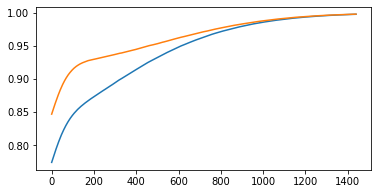

In [30]:
plt.figure(1, figsize=(6, 3))
plt.plot(weights_history)
plt.show()